## Compare all models in the "models" folder

In [136]:
import setGPU0
import os
from io_functions import *
from draw_functions import *
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [13]:
train_datad, test_datad, train_labels, test_labels = train_test(shape=(10000,), split=0.33)
train_datac, test_datac, train_labels, test_labels = train_test(shape=(1, 20, 20, 25), split=0.33)

In [138]:
# Quick way to make and save predictions for future use (won't need in the future)

### CHOOSE WHICH MODEL TO USE ###
label = 'conv10000'
### CHOOSE WHICH MODEL TO USE ###

# Get model and compile
model, history, pred = load_model(label)
model.compile(loss='binary_crossentropy', optimizer='sgd')

# Predict based on whether conv or not
if label[0]=='c':
    predict = model.predict(test_datac)
elif label[0]=='b':
    predict = model.predict([test_datac, test_datac, test_datac])
else:
    predict = model.predict(test_datad)
    
# Save
predict.reshape(predict.shape[0])
pickle.dump( (predict, test_labels), open('models/%s_p.pkl'%label,'w'))

In [139]:
# Load the models' predictions and histories
predictions = {}
histories = {}
for l in filter(None, os.popen('ls models/*.json').read().split('\n')):
    m_name = l.split('/')[-1].split('.')[0]
    
    # Load model information
    model, history, prediction = load_model(m_name)
    if prediction: predictions[m_name] = prediction
    else: print m_name + " needs predictions. Run previous codebox with label='"+m_name+"' to remedy this issue."
    histories[m_name] = history

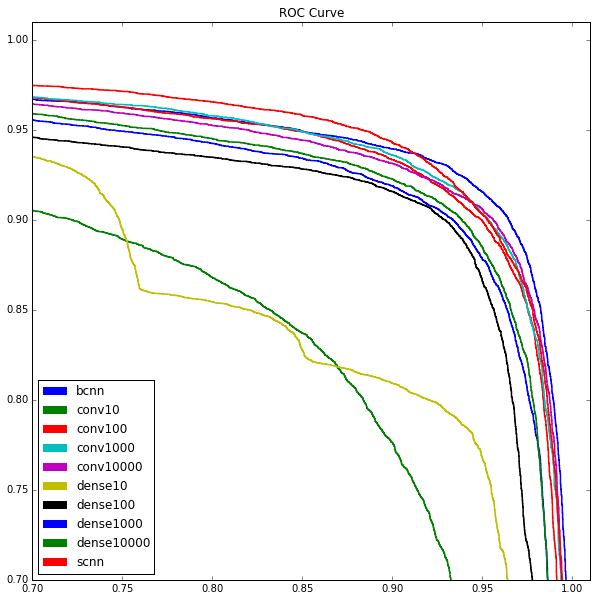

In [140]:
# Set up plot
plt.figure(figsize=(10,10))
plt.xlim([.7, 1.01])
plt.ylim([.7, 1.01])
plt.title("ROC Curve")

# Draw the roc curves
for label in sorted(predictions.keys()):
    pred = predictions[label][0].reshape(predictions[label][0].shape[0])
    truth = predictions[label][1].astype(int)
    fpr, tpr, _ = roc_curve(truth, pred)
    plt.plot( tpr, 1-fpr , label = label, linewidth=1.5)

# Draw the legend (with thick lines!)
leg = plt.legend(loc='lower left')
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

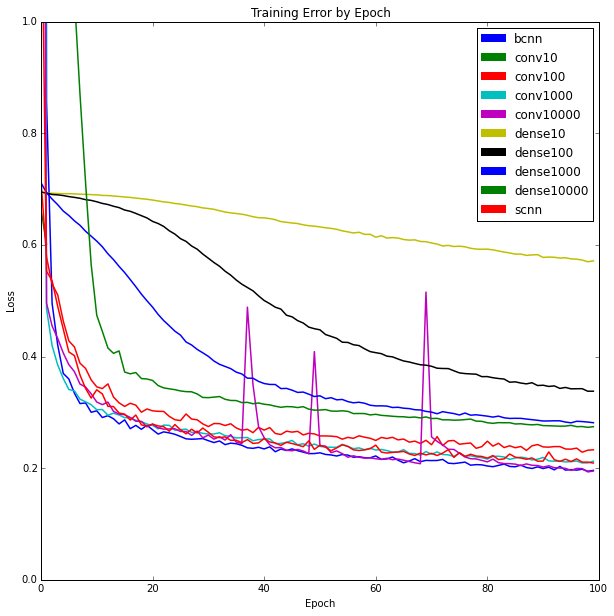

In [141]:
# Set up the plot
plt.figure(figsize=(10,10))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Error by Epoch')
plt.ylim(bottom=0)

# Draw the histories
for label in sorted(histories.keys()):
    plt.plot(histories[label], label = label, linewidth=1.5)

# Put in the legend (with thick lines!)
leg = plt.legend(loc='upper right')
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)